In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [ ]:
import  sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble
import sklearn.linear_model
import sklearn.tree
import sklearn.neighbors

In [ ]:
from scipy import stats

In [ ]:
data = pd.read_csv('Melbourne_housing_FULL.csv', index_col=0)
df = data.copy()
df.head()

,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Suburb,,,,,,,,,,,,,,,,,,,,
Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
print(" Shape of the Dataset:", df.shape)

 Shape of the Dataset: (34857, 20)


In [ ]:
print("Size of the Dataset:", df.size)

Size of the Dataset: 697140


In [ ]:
df.memory_usage()

Index            278856
Address          278856
Rooms            278856
Type             278856
Price            278856
Method           278856
SellerG          278856
Date             278856
Distance         278856
Postcode         278856
Bedroom2         278856
Bathroom         278856
Car              278856
Landsize         278856
BuildingArea     278856
YearBuilt        278856
CouncilArea      278856
Lattitude        278856
Longtitude       278856
Regionname       278856
Propertycount    278856
dtype: int64

In [ ]:
converted_columns = df.select_dtypes(include=['object']).columns
df[converted_columns] = df[converted_columns].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34857 entries, Abbotsford to Yarraville
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Address        34857 non-null  category
 1   Rooms          34857 non-null  int64   
 2   Type           34857 non-null  category
 3   Price          27247 non-null  float64 
 4   Method         34857 non-null  category
 5   SellerG        34857 non-null  category
 6   Date           34857 non-null  category
 7   Distance       34856 non-null  float64 
 8   Postcode       34856 non-null  float64 
 9   Bedroom2       26640 non-null  float64 
 10  Bathroom       26631 non-null  float64 
 11  Car            26129 non-null  float64 
 12  Landsize       23047 non-null  float64 
 13  BuildingArea   13742 non-null  float64 
 14  YearBuilt      15551 non-null  float64 
 15  CouncilArea    34854 non-null  category
 16  Lattitude      26881 non-null  float64 
 17  Longtitude     26881 n

In [ ]:
df.isnull().sum()

Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df.isna().sum()

Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df.mean()

<ipython-input-500-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Rooms            3.031012e+00
Price            1.050173e+06
Distance         1.118493e+01
Postcode         3.116063e+03
Bedroom2         3.084647e+00
Bathroom         1.624798e+00
Car              1.728845e+00
Landsize         5.935990e+02
BuildingArea     1.602564e+02
YearBuilt        1.965290e+03
Lattitude       -3.781063e+01
Longtitude       1.450019e+02
Propertycount    7.572888e+03
dtype: float64

In [ ]:
df.std()

<ipython-input-501-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Rooms                 0.969933
Price            641467.130105
Distance              6.788892
Postcode            109.023903
Bedroom2              0.980690
Bathroom              0.724212
Car                   1.010771
Landsize           3398.841946
BuildingArea        401.267060
YearBuilt            37.328178
Lattitude             0.090279
Longtitude            0.120169
Propertycount      4428.090313
dtype: float64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [ ]:
df.nunique()

Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [ ]:
df.corr(numeric_only=True).T

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420


In [ ]:
df.corrwith(other=df["Price"],numeric_only=True)

Rooms            0.465238
Price            1.000000
Distance        -0.211384
Postcode         0.044950
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Landsize         0.032748
BuildingArea     0.100754
YearBuilt       -0.333306
Lattitude       -0.215607
Longtitude       0.197874
Propertycount   -0.059017
dtype: float64

In [ ]:
df[df.duplicated()]

,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Suburb,,,,,,,,,,,,,,,,,,,,
Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,3.0,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [ ]:
display(df.drop_duplicates())

,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Suburb,,,,,,,,,,,,,,,,,,,,
Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(34856, 20)

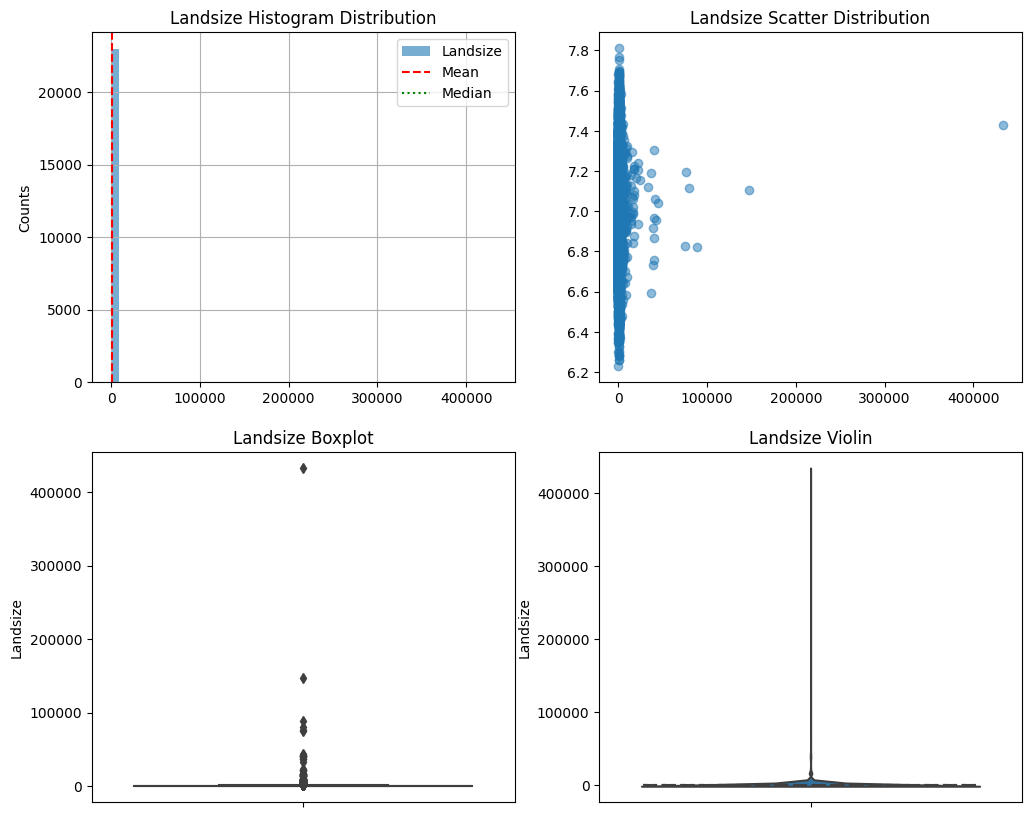

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df['Landsize'].hist(bins=50, label='Landsize', alpha=0.6)
plt.axvline(np.mean(df['Landsize']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Landsize']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Landsize Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df['Landsize'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5)
plt.title("Landsize Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="Landsize", data=df)
plt.title("Landsize Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="Landsize", data=df, inner="quartile", bw=0.2)
plt.title("Landsize Violin");

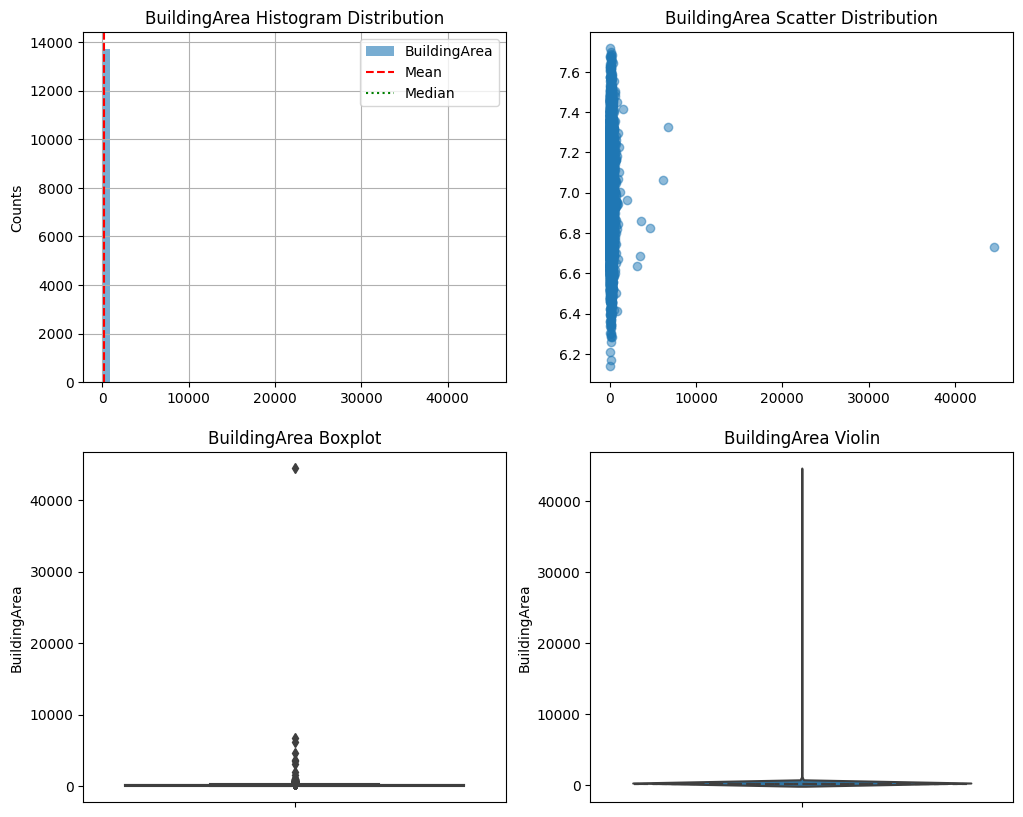

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df['BuildingArea'].hist(bins=50, label='BuildingArea', alpha=0.6)
plt.axvline(np.mean(df['BuildingArea']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['BuildingArea']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("BuildingArea Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df['BuildingArea'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5)
plt.title("BuildingArea Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="BuildingArea", data=df)
plt.title("BuildingArea Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="BuildingArea", data=df, inner="quartile", bw=0.2)
plt.title("BuildingArea Violin");

In [ ]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

def z_score(df, threshold=3):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good


In [ ]:
z_score(df['Landsize'], threshold=3).sum()

z-score of 3 corresponds to a prob of 0.27%
Rejection 11853 points


23003

In [ ]:
z_score(df['BuildingArea'], threshold=3).sum()

z-score of 3 corresponds to a prob of 0.27%
Rejection 21124 points


13732

z-score of 3 corresponds to a prob of 0.27%
Rejection 21124 points


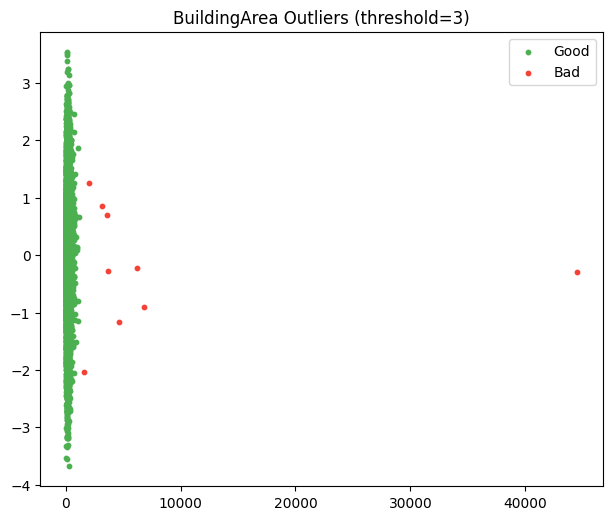

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot
plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 3)
visual_scatter = np.random.normal(size=df.shape[0])
good = z_score(df['BuildingArea'], threshold=3)
plt.scatter(df['BuildingArea'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
plt.scatter(df['BuildingArea'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
plt.legend()
plt.title(f"BuildingArea Outliers (threshold={3})")

plt.tight_layout()

z-score of 3 corresponds to a prob of 0.27%
Rejection 11853 points


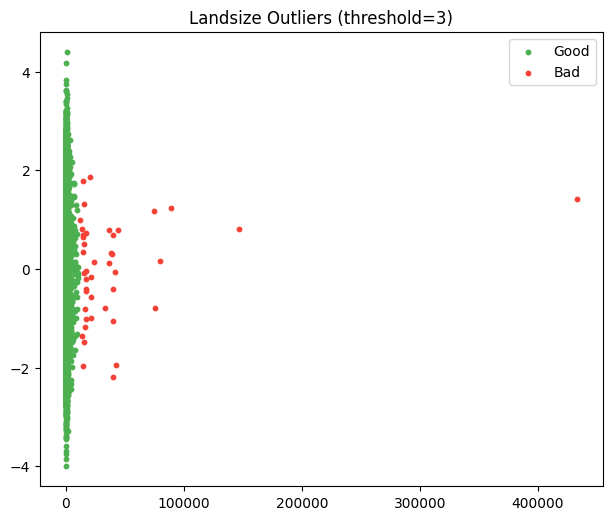

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot
plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 3)
visual_scatter = np.random.normal(size=df.shape[0])
good = z_score(df['Landsize'], threshold=3)
plt.scatter(df['Landsize'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
plt.scatter(df['Landsize'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
plt.legend()
plt.title(f"Landsize Outliers (threshold={3})")

plt.tight_layout()

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.axisartist.axislines import Subplot
# plt.figure(figsize=(12, 10))

# for i, threshold in zip(range(1, 5), range(2, 6)):
#     plt.subplot(2, 2, i)
#     visual_scatter = np.random.normal(size=df.shape[0])
#     good = z_score(df['BuildingArea'], threshold=threshold)
#     plt.scatter(df['BuildingArea'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
#     plt.scatter(df['BuildingArea'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
#     plt.legend()
#     plt.title(f"BuildingArea Outliers (threshold={threshold})")

# plt.tight_layout()

In [ ]:
# plt.figure(figsize=(12, 10))

# for i, threshold in zip(range(1, 5), range(2, 6)):
#     plt.subplot(2, 2, i)
#     visual_scatter = np.random.normal(size=df.shape[0])
#     good = z_score(df['Landsize'], threshold=threshold)
#     plt.scatter(df['Landsize'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
#     plt.scatter(df['Landsize'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
#     plt.legend()
#     plt.title(f"Landsize Outliers (threshold={threshold})")

# plt.tight_layout()

In [ ]:
df.drop(columns=["Postcode", "Landsize", "BuildingArea","Lattitude", "Longtitude", "Propertycount"], inplace=True)

In [ ]:
df.isna().sum()

Address            0
Rooms              0
Type               0
Price           7609
Method             0
SellerG            0
Date               0
Distance           1
Bedroom2        8217
Bathroom        8226
Car             8728
YearBuilt      19306
CouncilArea        3
Regionname         3
dtype: int64

In [ ]:
for Bathroom in df.columns:
  df["Bathroom"] = df["Bathroom"].fillna(df["Bathroom"].mode().iloc[0])

In [ ]:
for Car in df.columns:
  df["Car"] =  df["Car"].fillna(df["Car"].mode().iloc[0])

In [ ]:
df2 = df.dropna()
df2.shape

(12084, 14)

In [ ]:
missing = [col for col in df.columns if df[col].isna().any()]
print(missing)

['Price', 'Distance', 'Bedroom2', 'YearBuilt', 'CouncilArea', 'Regionname']


In [ ]:
for Bedroom2 in df.columns:
  df["Bedroom2"] =  df["Bedroom2"].fillna(df["Bedroom2"].mode().iloc[0])

In [ ]:
df.isna().sum()

Address            0
Rooms              0
Type               0
Price           7609
Method             0
SellerG            0
Date               0
Distance           1
Bedroom2           0
Bathroom           0
Car                0
YearBuilt      19306
CouncilArea        3
Regionname         3
dtype: int64

In [ ]:
for CouncilArea in df.columns:
  df["CouncilArea"] =  df["CouncilArea"].fillna(df["CouncilArea"].mode().iloc[0])

In [ ]:
for Regionname in df.columns:
  df["Regionname"] =  df["Regionname"].fillna(df["Regionname"].mode().iloc[0])

In [ ]:
df.isna().sum()

Address            0
Rooms              0
Type               0
Price           7609
Method             0
SellerG            0
Date               0
Distance           1
Bedroom2           0
Bathroom           0
Car                0
YearBuilt      19306
CouncilArea        0
Regionname         0
dtype: int64

In [ ]:
df.dropna(axis=0, subset="Distance", inplace=True)
df.drop(["Address", "YearBuilt", "Date"],axis=1,inplace=True)

In [ ]:
df.dropna(axis=0, subset="Price", inplace=True)

In [ ]:
df.isna().sum()

Rooms          0
Type           0
Price          0
Method         0
SellerG        0
Distance       0
Bedroom2       0
Bathroom       0
Car            0
CouncilArea    0
Regionname     0
dtype: int64

In [ ]:
grouped_price=df[["Price", "Rooms", "Regionname"]].groupby(["Rooms", "Regionname"]).agg("mean")

In [ ]:
for k1, v1 in df[df["Price"].isna()].iterrows():
    for k2, v2 in grouped_price.iterrows():
        if(v1["Rooms"] == k2[0] and v1["Regionname"] == k2[1]):
            df.at[k1, "Price"] = v2["Price"]

In [ ]:
df.isna().sum()

Rooms          0
Type           0
Price          0
Method         0
SellerG        0
Distance       0
Bedroom2       0
Bathroom       0
Car            0
CouncilArea    0
Regionname     0
dtype: int64

In [ ]:
df.dropna(axis=0, subset="Price", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27246 entries, Abbotsford to Yarraville
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Rooms        27246 non-null  int64   
 1   Type         27246 non-null  category
 2   Price        27246 non-null  float64 
 3   Method       27246 non-null  category
 4   SellerG      27246 non-null  category
 5   Distance     27246 non-null  float64 
 6   Bedroom2     27246 non-null  float64 
 7   Bathroom     27246 non-null  float64 
 8   Car          27246 non-null  float64 
 9   CouncilArea  27246 non-null  category
 10  Regionname   27246 non-null  category
dtypes: category(5), float64(5), int64(1)
memory usage: 1.6+ MB


In [ ]:
print(pd.concat([df.isnull().sum(), df.isnull().sum()/len(df)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

             Number of Missing Values  Ratio of Missing Values
Rooms                               0                      0.0
Type                                0                      0.0
Price                               0                      0.0
Method                              0                      0.0
SellerG                             0                      0.0
Distance                            0                      0.0
Bedroom2                            0                      0.0
Bathroom                            0                      0.0
Car                                 0                      0.0
CouncilArea                         0                      0.0
Regionname                          0                      0.0


Text(0.5, 1.0, 'Price Distribution')

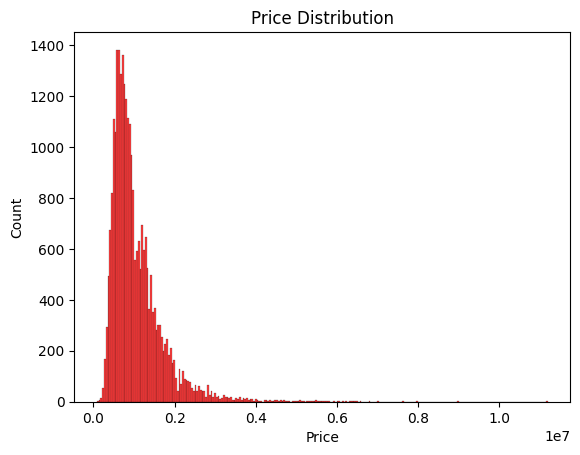

In [ ]:
sns.histplot(data=df["Price"], color="red")
plt.title(f"Price Distribution")

<Axes: title={'center': 'Car - Price'}, xlabel='Price', ylabel='Car'>

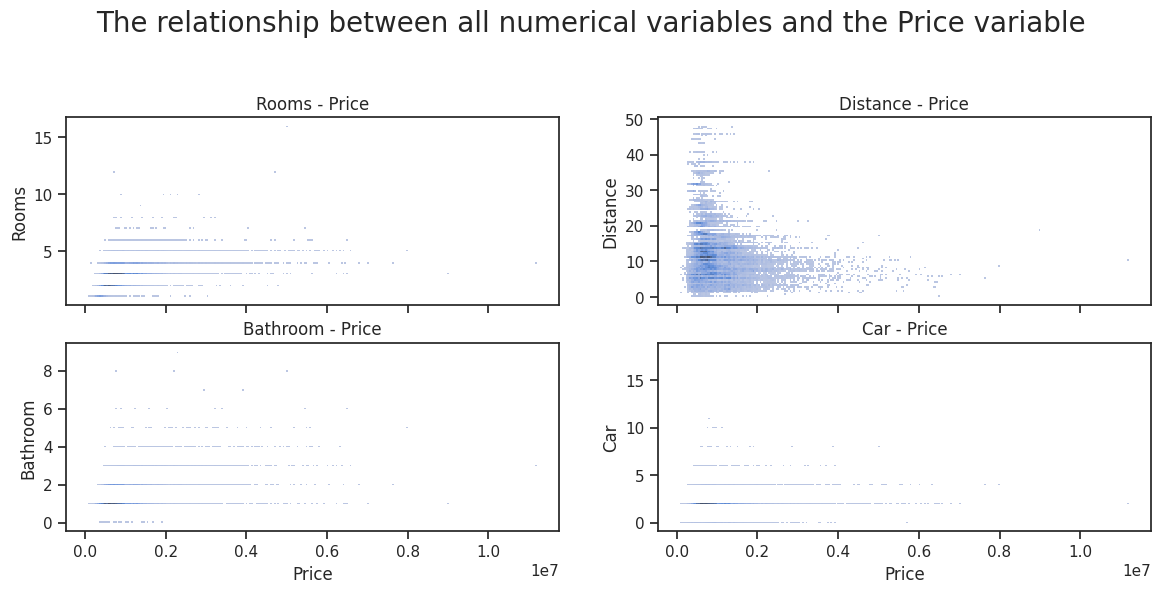

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(14,6))
fig.suptitle('The relationship between all numerical variables and the Price variable', fontsize=20)
axes[0,0].set_title('Rooms - Price')
axes[0,1].set_title('Distance - Price')
axes[1,0].set_title('Bathroom - Price')
axes[1,1].set_title('Car - Price')

plt.subplots_adjust(top=0.80)

sns.histplot(ax=axes[0,0], data=df, x="Price", y="Rooms")
sns.histplot(ax=axes[0,1], data=df, x="Price", y="Distance")
sns.histplot(ax=axes[1,0], data=df, x="Price", y="Bathroom")
sns.histplot(ax=axes[1,1], data=df, x="Price", y="Car")

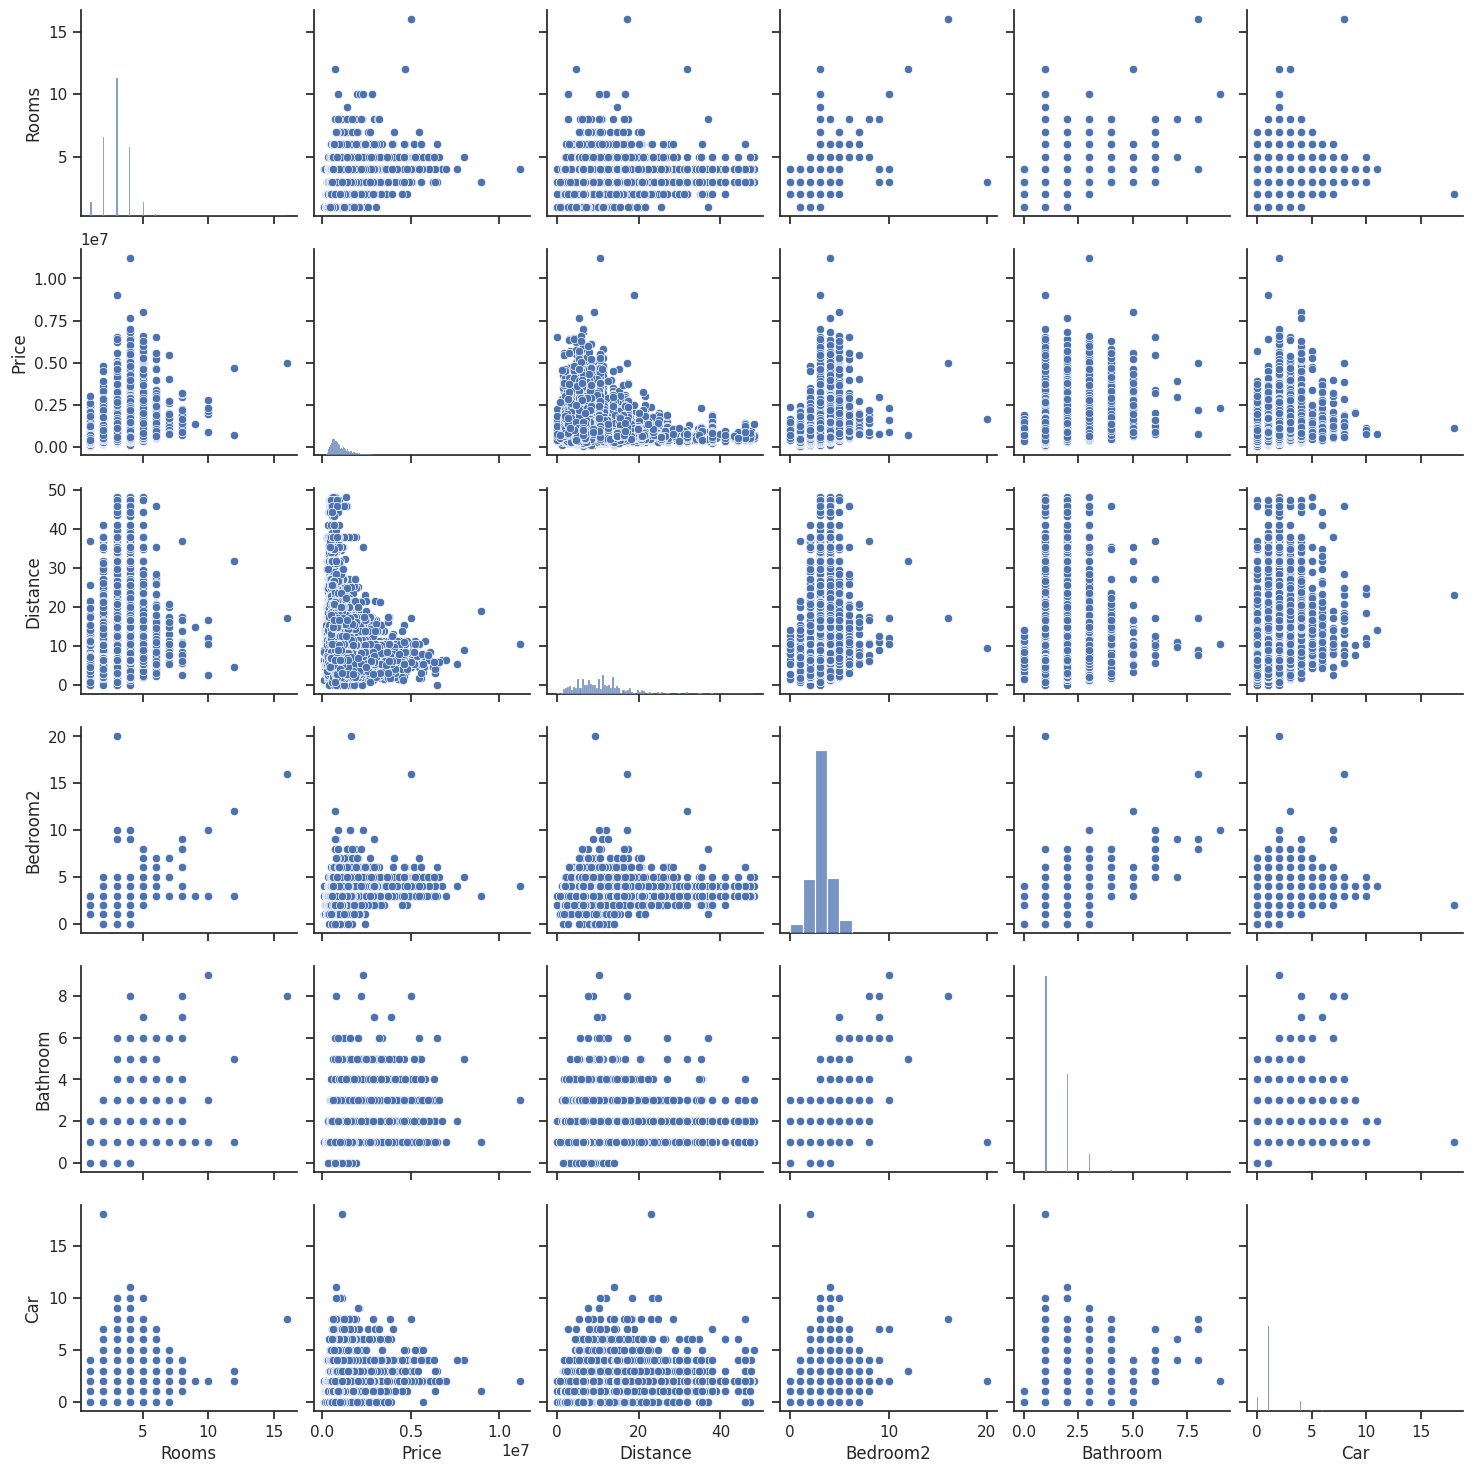

In [ ]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)
plt.show()

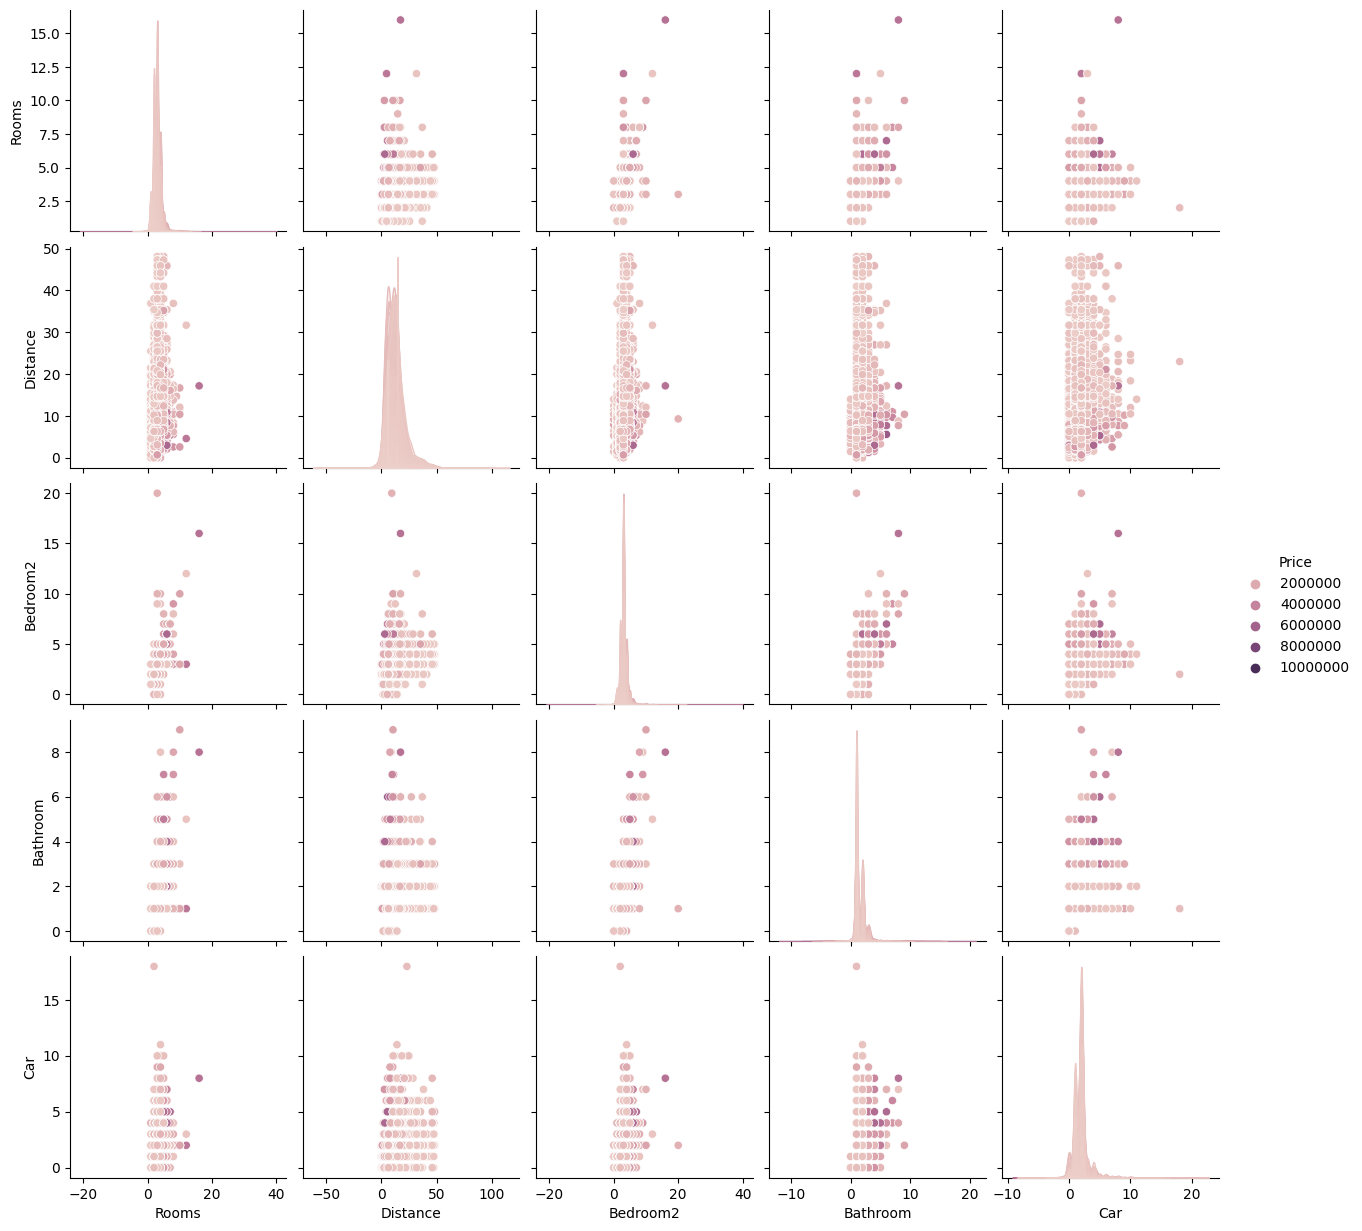

In [ ]:
sns.pairplot(df, hue = 'Price')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelcoded_df = df.copy(0)
converted_columns = df.select_dtypes(include="category").columns

le = LabelEncoder()

for i in converted_columns:
  labelcoded_df[i] = le.fit_transform(labelcoded_df[i])

In [ ]:
labelcoded_df

,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,CouncilArea,Regionname
Suburb,,,,,,,,,,,
Abbotsford,2,0,1480000.0,1,32,2.5,2.0,1.0,1.0,31,2
Abbotsford,2,0,1035000.0,1,32,2.5,2.0,1.0,0.0,31,2
Abbotsford,3,0,1465000.0,3,32,2.5,3.0,2.0,0.0,31,2
Abbotsford,3,0,850000.0,0,32,2.5,3.0,2.0,1.0,31,2
Abbotsford,4,0,1600000.0,4,206,2.5,3.0,1.0,2.0,31,2
...,...,...,...,...,...,...,...,...,...,...,...
Yarraville,4,0,1480000.0,0,140,6.3,4.0,1.0,3.0,16,6
Yarraville,2,0,888000.0,3,290,6.3,2.0,2.0,1.0,16,6
Yarraville,2,1,705000.0,1,140,6.3,2.0,1.0,2.0,16,6


In [ ]:
x = df['Price']
y= labelcoded_df.drop(['Price'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
y_train, y_test, x_train, x_test = train_test_split(y, x, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [ ]:
models = {
'Lasso': {
'model': Lasso()
},
'LinearRegression': {
'model': LinearRegression()
},
'Ridge': {
'model': Ridge()
},
'ElasticNet': {
'model': ElasticNet()
},
'KNeighborsRegressor': {
'model': KNeighborsRegressor()
},
'RandomForestRegressor': {
'model': RandomForestRegressor()
},
'GradientBoostingRegressor': {
'model': GradientBoostingRegressor()
},
'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
}}